In [1]:
# Main analysis packages
import numpy as np
import pandas as pd
from scipy import stats
from scipy.signal import argrelextrema
from sklearn.neighbors.kde import KernelDensity
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Plotting packages
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

%matplotlib nbagg

# Basic Analyses

In [2]:
# Import data
epic_male_scores = pd.read_csv('datasets/epic-male.csv')
epic_female_scores = pd.read_csv('datasets/epic-female.csv')
print(epic_male_scores.describe())
print(epic_female_scores.describe())

              Score      Tries
count     23.000000  21.000000
mean    5317.391304   3.190476
std     2309.004542   0.402374
min     2100.000000   3.000000
25%     3800.000000   3.000000
50%     4800.000000   3.000000
75%     6500.000000   3.000000
max    11100.000000   4.000000
             Score      Tries
count    12.000000  12.000000
mean   4541.666667   3.250000
std    2421.666719   0.621582
min     900.000000   3.000000
25%    2725.000000   3.000000
50%    4250.000000   3.000000
75%    6525.000000   3.000000
max    8900.000000   5.000000


[]

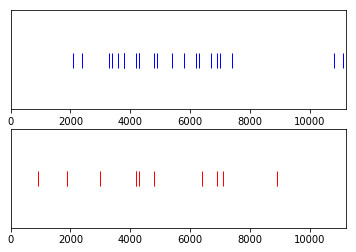

In [3]:
# Basic plots
x1 = epic_male_scores.Score.values
x2 = epic_female_scores.Score.values

# Find the maximum score for the graph limits, then add 100 for visibility.
x_max = np.max(np.concatenate((x1,x2))) + 100

# Plot the figures
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.plot(x1, np.zeros_like(x1),'|b', markersize=15)
ax1.set_xlim(0,x_max)
ax1.set_yticks([])
ax2.plot(x2, np.zeros_like(x2)+1,'|r', markersize=15)
ax2.set_xlim(0,x_max)
ax2.set_yticks([])

# Kernel Density Estimation

(1, -20)

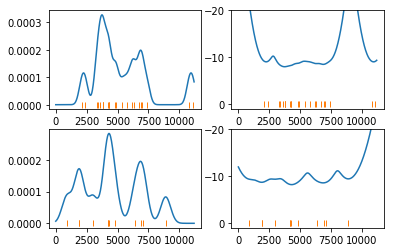

In [4]:
# Kernel Density Estimation using Sklearn
X_plot = np.linspace(0,x_max,500)[:, np.newaxis]
kde1 = KernelDensity(kernel='gaussian', bandwidth=250).fit(x1.reshape(-1,1))
log_dens1 = kde1.score_samples(X_plot)
kde2 = KernelDensity(kernel='gaussian', bandwidth=400).fit(x2.reshape(-1,1))
log_dens2 = kde2.score_samples(X_plot)

fig, ax = plt.subplots(nrows = 2, ncols = 2)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.plot(X_plot, np.exp(log_dens1))
ax1.plot(x1, np.zeros_like(x1),'|')
ax2.plot(X_plot, log_dens1)
ax2.plot(x1, np.zeros_like(x1),'|')
ax2.set_ylim(1,-20)
ax3.plot(X_plot, np.exp(log_dens2))
ax3.plot(x2, np.zeros_like(x2),'|')
ax4.plot(X_plot, log_dens2)
ax4.plot(x2, np.zeros_like(x2),'|')
ax4.set_ylim(1,-20)

# Finding Extrema
# mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
# print("Minima:", s[mi])
# print("Maxima:", s[ma])
# print("Max: ", np.max(x), " Min: ", np.min(x))

# Categorization
Using K-Means and Gaussian Mixture Models

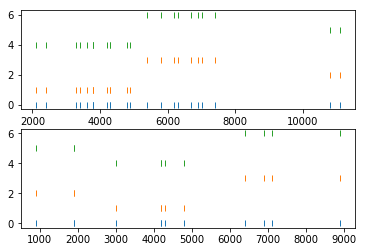

In [5]:
n_clusters = 3

# K-Means
kmeans1 = KMeans(n_clusters=n_clusters, random_state=0).fit(x1.reshape(-1, 1))
kcat1 = kmeans1.labels_

kmeans2 = KMeans(n_clusters=n_clusters, random_state=0).fit(x2.reshape(-1, 1))
kcat2 = kmeans2.labels_


# Gaussian Mixture Models
X1 = np.append(x1.reshape(-1,1),np.zeros([x1.size,1]),axis=1)
gmm1 = GaussianMixture(n_components=n_clusters,covariance_type='spherical',random_state=0).fit(X1)
gcat1 = gmm1.predict(X1)

X2 = np.append(x2.reshape(-1,1),np.zeros([x2.size,1]),axis=1)
gmm2 = GaussianMixture(n_components=n_clusters,covariance_type='spherical',random_state=0).fit(X2)
gcat2 = gmm2.predict(X2)

# Plot Everything
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 1)
ax1.plot(x1, np.zeros_like(x1),'|')
ax1.plot(x1, kcat1+1,'|')
ax1.plot(x1, gcat1+4,'|')
ax2.plot(x2, np.zeros_like(x2),'|')
ax2.plot(x2, kcat2+1,'|')
ax2.plot(x2, gcat2+4,'|')